<a href="https://colab.research.google.com/github/Farrukh666/Farrukh666/blob/main/Price_Elasticity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Importing Libraries

In [ ]:
# Importing some standard python libraries

!pip install pandas 
!pip install scikit-learn
!pip install statsmodels
!pip install matplotlib

import copy
import math
import numpy as np
import pandas as pd
import statsmodels.api as sm
import sklearn as sk
import matplotlib as mp

# This allows Jupyter-inlined plots.
import matplotlib.pyplot as plt
%matplotlib inline 

import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc, roc_auc_score, classification_report, confusion_matrix, make_scorer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

import warnings
warnings.filterwarnings("ignore")

import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import f1_score

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns  

import itertools

import scipy

!pip install category_encoders
import category_encoders as ce

! pip install numpy scipy
! pip install regressors

from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import KernelPCA, PCA, TruncatedSVD
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

####Importing Data

In [91]:
df = pd.read_csv('/content/Training.csv', header=0)
lf = pd.read_csv('/content/Testing.csv', header=0)

###Data Cleaning & Engineering

In [92]:
#Converting Dates column into Date Format
df['Date Text'] = df['Date Text'].astype('datetime64[ns]')
lf['Date Text'] = lf['Date Text'].astype('datetime64[ns]')

print("Missing values for data:", np.any(df.isnull().values))

Missing values for data: False


In [93]:
#Converting Date to Categorical Variable...

df['Day'] = df['Date Text'].dt.day
lf['Day']= lf['Date Text'].dt.day

df['Day'] = df['Day'].astype('category')
lf['Day'] = lf['Day'].astype('category')

In [94]:
#Seasonal One Hot Encoding

df.round(decimals = 2)
lf.round(decimals = 2)

df['Day_1'] = df['Day'].apply(lambda x: "High" if x <= 7 or x >=19 else "Low")

lf['Day_1'] = lf['Day'].apply(lambda x: "High" if x <= 7 or x >=19 else "Low")

y_train1=df['Sum of Units']

ce_me = ce.one_hot.OneHotEncoder(cols = ['Day_1'])

df1=ce_me.fit_transform(df,y_train1)
lf1=ce_me.transform(lf)

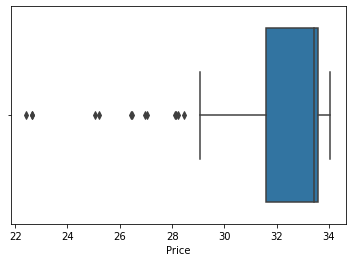

In [49]:
# Box Plot
import seaborn as sns
sns.boxplot(df1['Price'])

In [95]:
df1= df1.drop(['Date Text','Sum of Value'],axis=1)
lf1= lf1.drop(['Date Text','Sum of Value'],axis=1)

#PERFORMING LOG ON PRICES
#scaler1 = preprocessing.FunctionTransformer(np.log, validate=True).fit(df1[['Price_lf']])
#df1['Price_lf'] = scaler1.transform(df1[['Price_lf']])

#scaler2 = preprocessing.FunctionTransformer(np.log, validate=True).fit(lf[['Price_lf']])
#lf['Price_lf'] = scaler2.transform(lf[['Price_lf']])

#Scaling to log for Regression

scaler3 = preprocessing.FunctionTransformer(np.log, validate=True).fit(df1[['Price']])
df1['log_Price'] = scaler3.transform(df1[['Price']])

scaler4 = preprocessing.FunctionTransformer(np.log, validate=True).fit(df1[['Sum of Units']])
df1['log_Sum of Units'] = scaler4.transform(df1[['Sum of Units']])

scaler5 = preprocessing.FunctionTransformer(np.log, validate=True).fit(lf1[['Price']])
lf1['log_Price'] = scaler5.transform(lf1[['Price']])

scaler6 = preprocessing.FunctionTransformer(np.log, validate=True).fit(lf1[['Sum of Units']])
lf1['log_Sum of Units'] = scaler6.transform(lf1[['Sum of Units']])

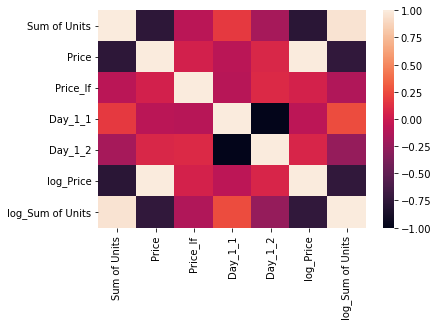

In [51]:
#Correlation between Variables
messi= df1.select_dtypes(include='number')
corr = messi.corr()
sns.heatmap(corr)

##Modeling

In [97]:
#Variables for Model..

X_train = df1.drop(['log_Sum of Units','Sum of Units','Price','Day'],axis=1)

X_test= lf1.drop(['log_Sum of Units','Sum of Units','Price','Day'],axis=1)

y_train=df1['log_Sum of Units']
y_test = lf1['log_Sum of Units']

In [98]:
#Using the linear CV model
#Ridge Regression & Lasso Regression
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.metrics import make_scorer
from sklearn.linear_model import Lasso, Ridge

#Lasso Cross validation
lasso_cv = LassoCV(alphas = [0.0001, 0.001,0.01, 0.1, 1, 10,20,30], random_state=0).fit(X_train, y_train)


#score
print(lasso_cv.score(X_train, y_train))
print(lasso_cv.score(X_test, y_test))

#Lasso Cross validation
ridge_cv = RidgeCV(alphas = [0.0001, 0.001,0.01, 0.1, 1, 10,20,30]).fit(X_train, y_train)

#score
print("The train score for ridge model is {}".format(ridge_cv.score(X_train, y_train)))
print("The train score for ridge model is {}".format(ridge_cv.score(X_test, y_test)))

0.6320142679499494
0.5653240913025575
The train score for ridge model is 0.6320205156106578
The train score for ridge model is 0.5648482282555085


In [99]:
print("The train score for ridge model is {}".format(ridge_cv.score(X_test, y_test)))
y_pred_cv = ridge_cv.predict(X_test)

y_pred_cv_lasso = lasso_cv.predict(X_test)

The train score for ridge model is 0.5648482282555085


In [100]:
#RIDGE Regression Results in Log
y_pred_cv

array([8.11005149, 7.15354054, 7.67432165, 7.31672939, 7.29379856,
       7.15113563, 7.15896079, 7.29499976, 7.29800549, 7.15474393,
       7.15173662, 7.71075288, 7.70428168, 7.33011058, 7.17347769,
       7.72737376])

In [101]:
X_train.head(1)

,Day_1_1,Day_1_2,log_Price
0,1,0,3.517201


In [102]:
#Co-efficients of Ridge Regression
print(ridge_cv.intercept_)
print(ridge_cv.coef_)

from regressors import stats
stats.summary(ridge_cv,X_train, y_train)

15.58541302780753
[ 0.07223248 -0.07223248 -2.29547694]


LinAlgError: ignored

In [58]:
#Only Open Code if wanting to use linear Regression...

#import statsmodels.api as sm
# Linear Regression via statsmodels package.
#X_sm = sm.add_constant(X_train) # Statmodel does not add intercept by default, so let us explicitly require it.
#ols_sm = sm.OLS(y_train, X_sm).fit() # Fit linear regression (ordinary least squares).
#ols_sm.summary() # Summary of model results.
#print(ols_sm.summary())

###Downloading Results

In [59]:
dettol = pd.DataFrame(y_pred_cv)
price = pd.DataFrame(X_test)
price2= pd.DataFrame(X_train)

In [60]:
price2.to_csv('X_train.csv', index=False)
price.to_csv('X_test.csv', index=False)
dettol.to_csv('dettol_pred.csv', index=False)

In [61]:
#PREDICTIONS
from google.colab import files

with open('dettol_pred.csv') as f:
  files.download('dettol_pred.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [62]:
#TESTING FILE - PRICES
from google.colab import files

with open('X_test.csv') as f:
  files.download('X_test.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [63]:
#Training Data Utilized
from google.colab import files

with open('X_train.csv') as f:
  files.download('X_train.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>